In [1]:
import os
import warnings

import numpy as np
import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_path = '../data/'
raw = 'raw'
processed = 'processed'
type_of_data = 'fertilizer'
append_in = '_'+type_of_data+'_'+raw+'.xls'
append_out = '_'+type_of_data+'_'+processed+'.csv'

kenya_name = 'kenya'
rwanda_name = 'rwanda'
tanzania_name = 'tanzania'
uganda_name = 'uganda'

#where to load from
kenya_load = os.path.join(data_path, raw, type_of_data, kenya_name+append_in)
rwanda_load = os.path.join(data_path, raw, type_of_data, rwanda_name+append_in)
tanzania_load = os.path.join(data_path, raw, type_of_data, tanzania_name+append_in)
uganda_load = os.path.join(data_path, raw, type_of_data, uganda_name+append_in)

#where to save to
kenya_save = os.path.join(data_path, processed, type_of_data, kenya_name+append_out)
rwanda_save = os.path.join(data_path, processed, type_of_data, rwanda_name+append_out)
tanzania_save = os.path.join(data_path, processed, type_of_data, tanzania_name+append_out)
uganda_save = os.path.join(data_path, processed, type_of_data, uganda_name+append_out)

In [5]:
print(tanzania_load)
print(tanzania_save)

../data/raw/fertilizer/tanzania_fertilizer_raw.xls
../data/processed/fertilizer/tanzania_fertilizer_processed.csv


## Read in data
The file format is strange: the rows often don't align, and trying to use `pd.read_excel()` causes an error saying that the file type is corrupted. One work-around is to use `pd.read_html` and then subset the resulting list for the dataframe that we are interested in.

Let's try out a processing workflow for the Tanzania data.

In [6]:
df_list = pd.read_html(tanzania_load, skiprows=4)
df = pd.DataFrame(df_list[0])

columns = df.loc[0, :]
df = df.loc[1:, :]

columns = [str(column) for column in columns]
df.columns = columns

In [7]:
df.head(20)

,Country,Fertilizer,Type,Unit,May,Jun,Jul,Aug,Sep,Oct,...,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,2019.0,nan
1,Tanzania,DAP,Commercial,USD/Ton,716,694,740,736,752,806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tanzania,DAP,Commercial,USD/Ton,NaN,NaN,NaN,NaN,NaN,NaN,...,566,564,567,567,574,566,553,569,566.0,NaN
3,Tanzania,DAP,Commercial,Commercial,716,694,740,736,752,806,...,566,564,567,567,574,566,553,569,566.0,NaN
4,Tanzania,DAP,Subsidized,USD/Ton,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tanzania,DAP,Subsidized,Subsidized,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Tanzania,DAP,DAP,DAP,716,694,740,736,752,806,...,566,564,567,567,574,566,553,569,566.0,NaN
7,Tanzania,Urea,Commercial,USD/Ton,475,492,466,516,490,546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tanzania,Urea,Commercial,USD/Ton,NaN,NaN,NaN,NaN,NaN,NaN,...,498,492,493,494,490,494,504,495,496.0,NaN
9,Tanzania,Urea,Commercial,Commercial,475,492,466,516,490,546,...,498,492,493,494,490,494,504,495,496.0,NaN
10,Tanzania,Urea,Subsidized,USD/Ton,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get fertilizer data that has units USD/Ton

In [8]:
dap = df[df.Unit=='DAP']
urea = df[df.Unit=='Urea']

In [9]:
dap.head()

,Country,Fertilizer,Type,Unit,May,Jun,Jul,Aug,Sep,Oct,...,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,2019.0,nan
6,Tanzania,DAP,DAP,DAP,716,694,740,736,752,806,...,566,564,567,567,574,566,553,569,566.0,NaN


In [10]:
tanzania = pd.concat([dap, urea], axis=0).reset_index(drop=True)

In [11]:
tanzania.head()

,Country,Fertilizer,Type,Unit,May,Jun,Jul,Aug,Sep,Oct,...,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,2019.0,nan
0,Tanzania,DAP,DAP,DAP,716,694,740,736,752,806,...,566,564,567,567,574,566,553,569,566.0,NaN
1,Tanzania,Urea,Urea,Urea,475,492,466,516,490,546,...,498,492,493,494,490,494,504,495,496.0,NaN


In [12]:
tanzania.fillna(0, inplace=True)
tanzania.head()

,Country,Fertilizer,Type,Unit,May,Jun,Jul,Aug,Sep,Oct,...,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,2019.0,nan
0,Tanzania,DAP,DAP,DAP,716,694,740,736,752,806,...,566,564,567,567,574,566,553,569,566.0,0.0
1,Tanzania,Urea,Urea,Urea,475,492,466,516,490,546,...,498,492,493,494,490,494,504,495,496.0,0.0


## Correct column names to include dates

In [13]:
def get_corrected_columns(df):
    #starting date is 2010, so we want data to have the format: May-10, for example
    counter = 10
    corrected_columns = []

    for column in df.columns:
        if column in ['Country', 'Fertilizer', 'Type', 'Unit']:
            corrected_columns.append(column)
        elif column.startswith('2') or column=='nan':
            counter+=1
            corrected_columns.append(column)
        else:
            column = column+'-'+str(counter)
            corrected_columns.append(column)
            
    return corrected_columns

In [14]:
corrected_columns = get_corrected_columns(tanzania)
print(corrected_columns)

['Country', 'Fertilizer', 'Type', 'Unit', 'May-10', 'Jun-10', 'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10', '2010.0', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', '2011.0', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12', 'Jul-12', 'Aug-12', 'Nov-12', '2012.0', 'Jan-13', 'Feb-13', 'Mar-13', 'Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', '2013.0', 'Jan-14', 'Feb-14', 'Mar-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', '2014.0', 'Jan-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', '2015.0', 'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', '2016.0', 'Sep-17', 'Oct-17', 'Nov-17', '2017.0', 'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', '2018.0', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19'

In [15]:
tanzania.columns = corrected_columns
tanzania.head()

,Country,Fertilizer,Type,Unit,May-10,Jun-10,Jul-10,Aug-10,Sep-10,Oct-10,...,Feb-19,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19,2019.0,nan
0,Tanzania,DAP,DAP,DAP,716,694,740,736,752,806,...,566,564,567,567,574,566,553,569,566.0,0.0
1,Tanzania,Urea,Urea,Urea,475,492,466,516,490,546,...,498,492,493,494,490,494,504,495,496.0,0.0


## Drop float columns here, convert data to USD/kg

The Tanzania price dataset has columns for yearly totals despite trying to filter them out, and a NaN column at the end. We need to filter these out.

In [16]:
drop_columns = [column for column in columns if column.startswith('2') or column=='nan']

In [17]:
print(drop_columns)

['2010.0', '2011.0', '2012.0', '2013.0', '2014.0', '2015.0', '2016.0', '2017.0', '2018.0', '2019.0', 'nan']


In [18]:
tanzania.drop(drop_columns, axis=1, inplace=True)
tanzania.head()

,Country,Fertilizer,Type,Unit,May-10,Jun-10,Jul-10,Aug-10,Sep-10,Oct-10,...,Dec-18,Jan-19,Feb-19,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19
0,Tanzania,DAP,DAP,DAP,716,694,740,736,752,806,...,555,569,566,564,567,567,574,566,553,569
1,Tanzania,Urea,Urea,Urea,475,492,466,516,490,546,...,506,505,498,492,493,494,490,494,504,495


In [19]:
#we only care about the price data now
tanzania.drop(['Country', 'Fertilizer', 'Type', 'Unit'], axis=1, inplace=True)

#convert string values to float values for each column
tanzania = tanzania.astype(float)

#now covert from $/ton to $/kg
tanzania.fillna(0, inplace=True)
pounds_in_ton = 2000
pounds_to_kg = 0.45359
conversion = 1 / pounds_in_ton / pounds_to_kg        #USD/ton * 1ton/2000lb * 1lb/0.45359kg
tanzania *= conversion
tanzania.replace(0, np.nan, inplace=True)

In [20]:
tanzania.head()

,May-10,Jun-10,Jul-10,Aug-10,Sep-10,Oct-10,Nov-10,Dec-10,Jan-11,Feb-11,...,Dec-18,Jan-19,Feb-19,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19
0,0.789259,0.765008,0.815715,0.811305,0.828942,0.888468,0.940276,0.902798,0.919332,1.014132,...,0.611786,0.627218,0.623911,0.621707,0.625014,0.625014,0.632730,0.623911,0.609581,0.627218
1,0.523601,0.542340,0.513680,0.568796,0.540135,0.601865,0.643753,0.616195,0.654776,0.708790,...,0.557772,0.556670,0.548954,0.542340,0.543442,0.544545,0.540135,0.544545,0.555568,0.545647


In [21]:
#our two dataframes are rows, whereas we want columns: transpose
tanzania = tanzania.transpose().reset_index()
tanzania.columns = ['Date-Monthly', 'DAP', 'Urea']

In [22]:
tanzania.head()

,Date-Monthly,DAP,Urea
0,May-10,0.789259,0.523601
1,Jun-10,0.765008,0.542340
2,Jul-10,0.815715,0.513680
3,Aug-10,0.811305,0.568796
4,Sep-10,0.828942,0.540135


In [23]:
#now interpolate
tanzania.interpolate(inplace=True)

In [24]:
def plot_fertilizer_prices(df, name):
    df.plot()
    plt.xlabel('Time-->')
    plt.ylabel('USD/kg')
    plt.title('Fertilizer Prices (2010-2018), {}'.format(name.title()))
    plt.show()

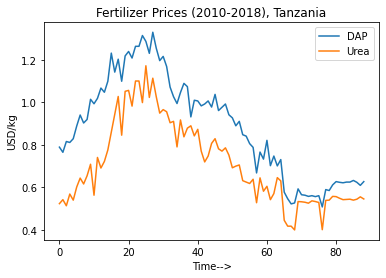

In [25]:
plot_fertilizer_prices(tanzania, tanzania_name)

## Process all data
Let's define a method that works for all of our data.

In [26]:
def load_fertilizer_data(path):
    df_list = pd.read_html(path, skiprows=4)
    df = pd.DataFrame(df_list[0])

    columns = df.loc[0, :]
    df = df.loc[1:, :]

    columns = [str(column) for column in columns]
    df.columns = columns
    
    dap = df[df.Unit=='DAP']
    urea = df[df.Unit=='Urea']

    #make single dataframe from two 1D pandas dataframes
    country = pd.concat([dap, urea], axis=0).reset_index(drop=True)

    #add dates to columns
    corrected_columns = get_corrected_columns(country)
    country.columns = corrected_columns

    #drop unnecessary columns
    drop_columns = [column for column in columns if column.startswith('2') or column=='nan']
    country.drop(drop_columns, axis=1, inplace=True)

    #we only care about price data now
    country.drop(['Country', 'Fertilizer', 'Type', 'Unit'], axis=1, inplace=True)

    #convert string values to float values for each column
    country = country.astype(float)

    #now covert from $/ton to $/kg
    country.fillna(0, inplace=True)
    pounds_in_ton = 2000
    pounds_to_kg = 0.45359
    conversion = 1 / pounds_in_ton / pounds_to_kg        #USD/ton * 1ton/2000lb * 1lb/0.45359kg
    country *= conversion
    country.replace(0, np.nan, inplace=True)
    
    #transpose dataframe, rename columns
    country = country.transpose().reset_index()
    country.columns = ['Date-Monthly', 'DAP', 'Urea']
    
    #lastly, interpolate values
    country.interpolate(inplace=True)
    
    return country

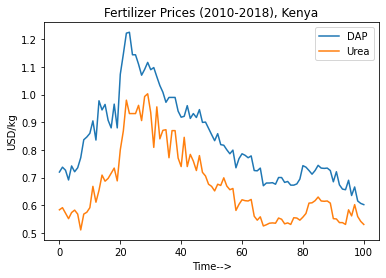

In [27]:
kenya = load_fertilizer_data(kenya_load)
plot_fertilizer_prices(kenya, kenya_name)

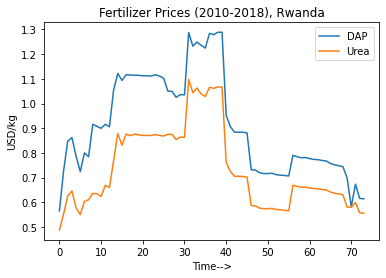

In [28]:
rwanda = load_fertilizer_data(rwanda_load)
plot_fertilizer_prices(rwanda, rwanda_name)

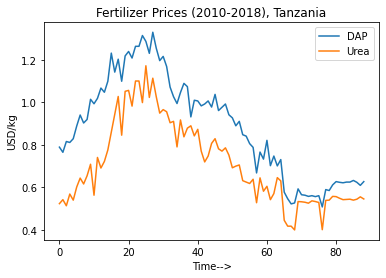

In [29]:
tanzania = load_fertilizer_data(tanzania_load)
plot_fertilizer_prices(tanzania, tanzania_name)

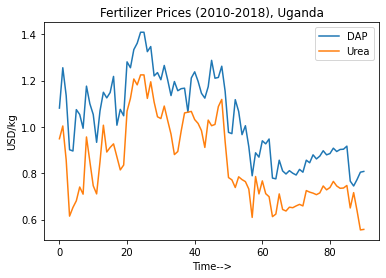

In [30]:
uganda = load_fertilizer_data(uganda_load)
plot_fertilizer_prices(uganda, uganda_name)

In [31]:
#save data
#kenya.to_csv(kenya_save)
#rwanda.to_csv(rwanda_save)
#tanzania.to_csv(tanzania_save)
#uganda.to_csv(uganda_save)